In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
market=pd.read_csv("/Users/da-m1-09/Downloads/Final_Mar.csv")
market

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,year,month,day,selling_price
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020/03/10,108.0,112.0,3236.0,29.0,348.0,0.0,9.30,2020.0,3.0,10.0,111.59
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020/09/09,150.0,170.0,51710.0,332.0,6075.6,822.0,8.51,2020.0,9.0,9.0,155.75
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020/05/05,70.0,80.0,4860.0,66.0,1320.0,50.0,3.68,2020.0,5.0,5.0,73.64
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020/01/20,60.0,60.0,600.0,10.0,90.0,0.0,6.67,2020.0,1.0,20.0,60.00
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020/07/14,40.0,45.0,41530.0,927.0,9270.0,393.0,4.48,2020.0,7.0,14.0,44.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64371,TRANSVAAL,AG100,1M,10.0,ONIONS MILD,2020/05/18,70.0,75.0,19695.0,281.0,2810.0,3583.0,7.01,2020.0,5.0,18.0,70.09
64372,IMPORTS - OUTSIDE RSA,BC180,X,18.0,BANANA,2020/02/05,160.0,220.0,13560.0,72.0,1296.0,887.0,10.46,2020.0,2.0,5.0,188.33
64373,TRANSVAAL,TS035,1M,3.5,TOMATOES-LONG LIFE,2020/08/20,20.0,20.0,6000.0,300.0,1050.0,900.0,5.71,2020.0,8.0,20.0,20.00
64374,NATAL,BJ100,2M,10.0,LEMON,2020/08/18,50.0,80.0,16730.0,277.0,2770.0,372.0,6.04,2020.0,8.0,18.0,60.40


In [2]:
market['Province'].nunique()

22

In [3]:
from datetime import datetime
market['Date']=pd.to_datetime(market['Date'],format='%Y/%m/%d')

In [4]:
market["year"]=market['Date'].dt.year
market['month']=market['Date'].dt.month
market['day']=market['Date'].dt.day
market.to_csv("/Users/da-m1-09/Downloads/MarketFinal.csv")

In [5]:
market.groupby('Province')['Sales_Total'].sum().nlargest(5)


Province
TRANSVAAL                3.247973e+08
CAPE                     2.010222e+08
NATAL                    9.620481e+07
WESTERN CAPE - CERES     9.590892e+07
IMPORTS - OUTSIDE RSA    8.584176e+07
Name: Sales_Total, dtype: float64

<Axes: xlabel='Province'>

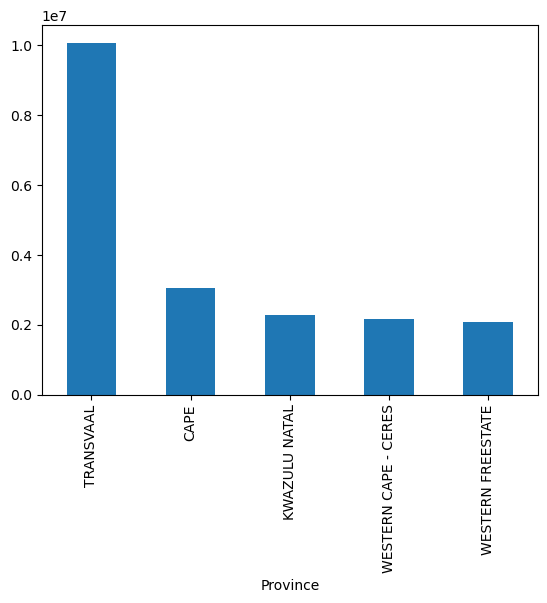

In [6]:
market.groupby('Province')['Total_Qty_Sold'].sum().nlargest(5).plot(kind='bar')

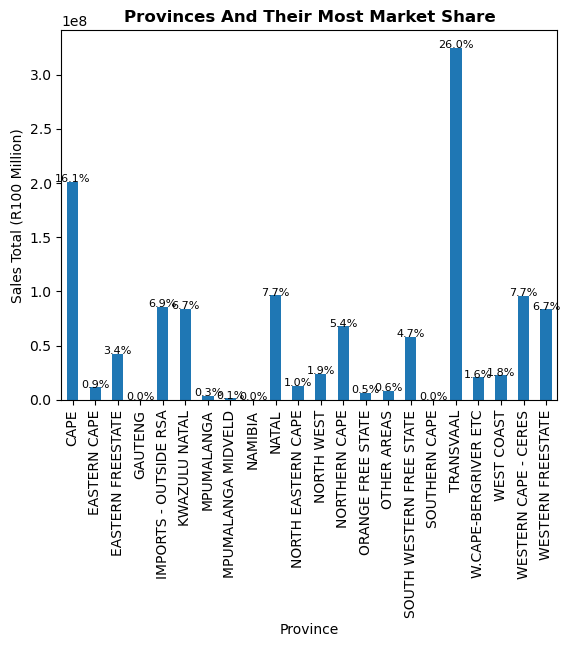

In [6]:
province_sales=market.groupby('Province')['Sales_Total'].sum()
total_sales_all_provinces=market["Sales_Total"].sum()
percent=(province_sales/total_sales_all_provinces)*100
province_sales.plot(kind='bar',width=0.5)
plt.xlabel("Province")
plt.ylabel("Sales Total (R100 Million)")
plt.title('Provinces And Their Most Market Share', fontweight='bold')
for i, (value, percentage) in enumerate(zip(province_sales, percent)):
    plt.text(i, value + 10, f"{percentage:.1f}%", ha='center', fontsize=8)
plt.show()

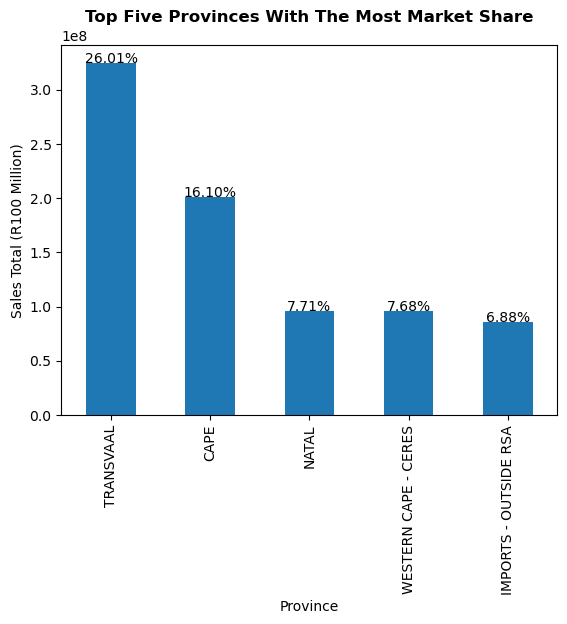

In [7]:
province_sales=market.groupby('Province')['Sales_Total'].sum()
total_sales_all_provinces=market["Sales_Total"].sum()
topFive=province_sales.nlargest(5)
percent=(topFive/total_sales_all_provinces)*100
topFive.plot(kind='bar')
plt.xlabel("Province")
plt.ylabel("Sales Total (R100 Million)")
plt.title('Top Five Provinces With The Most Market Share', fontweight='bold')
for i, v in enumerate(topFive):
    plt.text(i, v + 10, f"{percent[topFive.index[i]]:.2f}%", ha='center')
plt.show()

In [8]:
market.groupby('Province')['Sales_Total'].sum().nsmallest(5)

Province
NAMIBIA                 50215.0
SOUTHERN CAPE          111193.0
GAUTENG                140830.0
MPUMALANGA MIDVELD    1294917.3
MPUMALANGA            3642644.0
Name: Sales_Total, dtype: float64

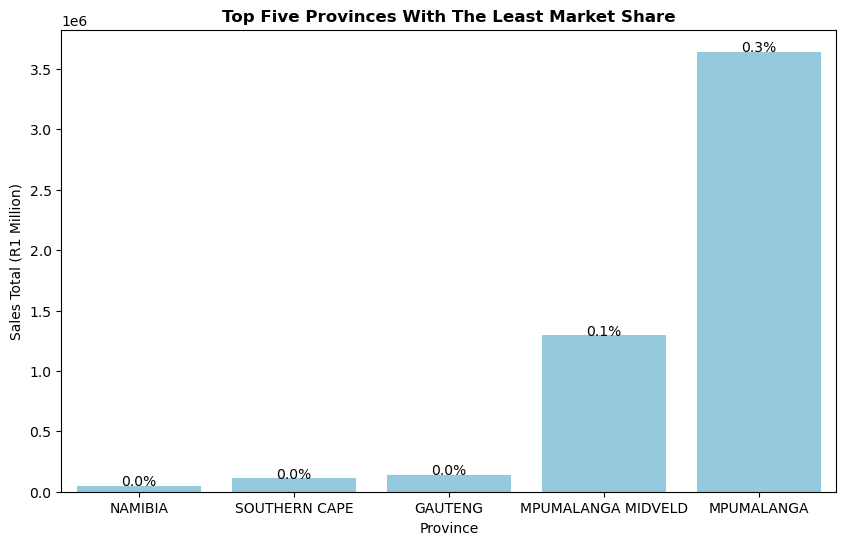

In [8]:
province_sales=market.groupby('Province')['Sales_Total'].sum()
total_sales_all_provinces=market["Sales_Total"].sum()
topFive=province_sales.nsmallest(5)
percent=(topFive/total_sales_all_provinces)*100
plt.figure(figsize=(10,6))
sns.barplot(x=topFive.index, y=topFive.values,color='skyblue')
plt.xlabel("Province")
plt.ylabel("Sales Total (R1 Million)")
plt.title('Top Five Provinces With The Least Market Share', fontweight='bold')
for i, v in enumerate(topFive):
    plt.text(i, v + 10, f"{percent[topFive.index[i]]:.1f}%", ha='center')
plt.show()

In [106]:
market.groupby('Province')['Sales_Total'].sum().nlargest(5)

Province
TRANSVAAL                3.247973e+08
CAPE                     2.010222e+08
NATAL                    9.620481e+07
WESTERN CAPE - CERES     9.590892e+07
IMPORTS - OUTSIDE RSA    8.584176e+07
Name: Sales_Total, dtype: float64

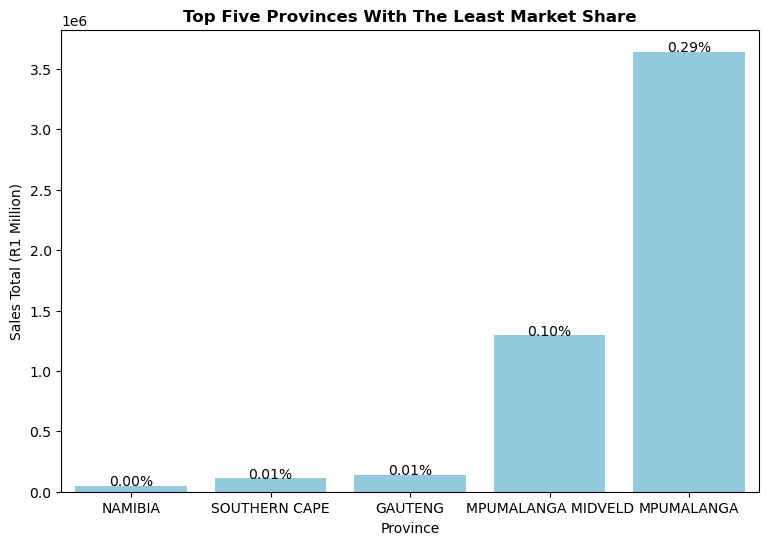

In [98]:
province_sales=market.groupby('Province')['Sales_Total'].sum()
total_sales_all_provinces=market["Sales_Total"].sum()
topFive=province_sales.nsmallest(5)
percent=(topFive/total_sales_all_provinces)*100
plt.figure(figsize=(9,6))
sns.barplot(x=topFive.index,y=topFive.values, color='skyblue')
plt.xlabel("Province")
plt.ylabel("Sales Total (R1 Million)")
plt.title('Top Five Provinces With The Least Market Share', fontweight='bold')
for i, v in enumerate(topFive):
    plt.text(i, v + 10, f"{percent[topFive.index[i]]:.2f}%", ha='center')
plt.show()

In [107]:
market.groupby('Province')[['Total_Qty_Sold', 'Stock_On_Hand']].sum().nlargest(5, ['Total_Qty_Sold', 'Stock_On_Hand'])

,Total_Qty_Sold,Stock_On_Hand
Province,,
TRANSVAAL,10079412,9711445
CAPE,3053037,4808244
KWAZULU NATAL,2269931,1582621
WESTERN CAPE - CERES,2178763,3546286
WESTERN FREESTATE,2083798,1009614


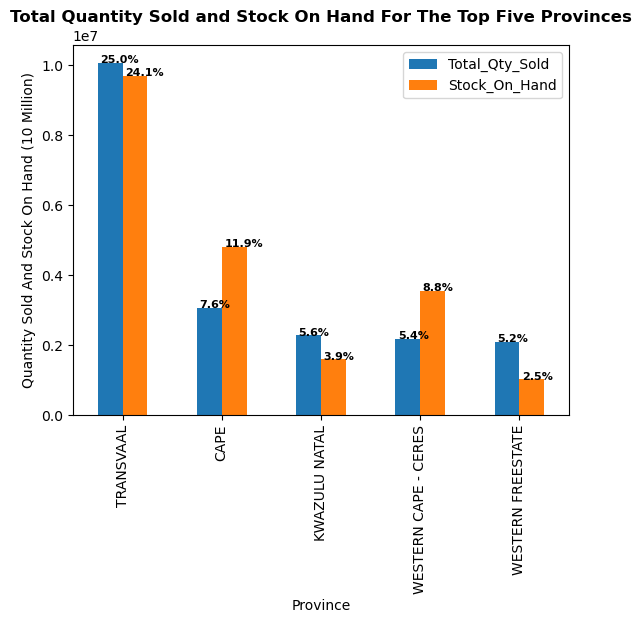

In [9]:
g = market.groupby('Province')[['Total_Qty_Sold', 'Stock_On_Hand']].sum().nlargest(5, ['Total_Qty_Sold', 'Stock_On_Hand'])
ax = g.plot(kind='bar')
plt.title("Total Quantity Sold and Stock On Hand For The Top Five Provinces", fontweight='bold')
plt.ylabel('Quantity Sold And Stock On Hand (10 Million)')

# Adding percentage labels
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / g.sum().sum())
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 0.5
    ax.annotate(percentage, (x, y), fontsize=8, fontweight='bold')

plt.show()

In [108]:
market.groupby('Province')[['Total_Qty_Sold', 'Stock_On_Hand']].sum().nsmallest(5, ['Total_Qty_Sold', 'Stock_On_Hand'])

,Total_Qty_Sold,Stock_On_Hand
Province,,
NAMIBIA,744,553
GAUTENG,2094,10296
SOUTHERN CAPE,3167,1120
ORANGE FREE STATE,46174,117165
MPUMALANGA MIDVELD,72665,128059


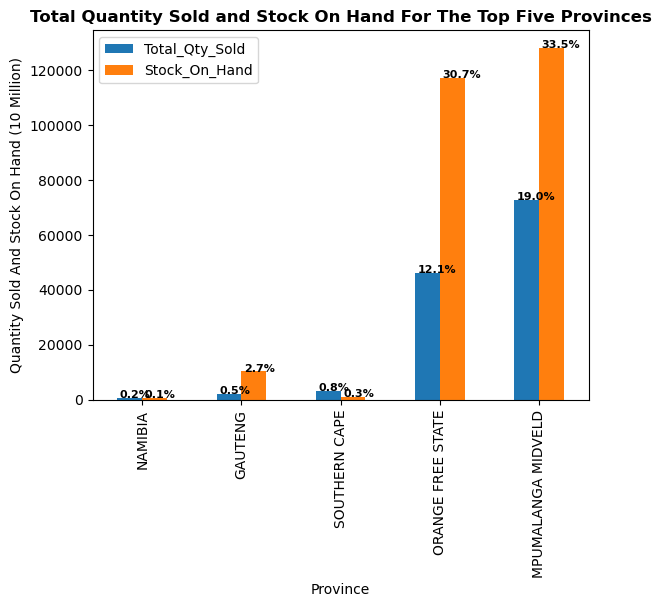

In [10]:
g = market.groupby('Province')[['Total_Qty_Sold', 'Stock_On_Hand']].sum().nsmallest(5, ['Total_Qty_Sold', 'Stock_On_Hand'])
ax = g.plot(kind='bar')
plt.title("Total Quantity Sold and Stock On Hand For The Top Five Provinces", fontweight='bold')
plt.ylabel('Quantity Sold And Stock On Hand (10 Million)')

# Adding percentage labels
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / g.sum().sum())
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 0.5
    ax.annotate(percentage, (x, y), fontsize=8, fontweight='bold')

plt.show()

##This plot shows the most sold commodity in from the provinces that are having the highest market share.

In [ ]:
# market.groupby(['Province','Commodities'])[['Total_Qty_Sold']].sum().nlargest(5,['Total_Qty_Sold']).plot(kind='bar')
# plt.title("Most Sold Commodities From The Top Five Provinces",fontweight='bold')
# plt.xlabel("Province and Commodity")
# plt.ylabel('Quantity Sold (1 Million)')

Text(0, 0.5, 'Quantity Sold (1 Million)')

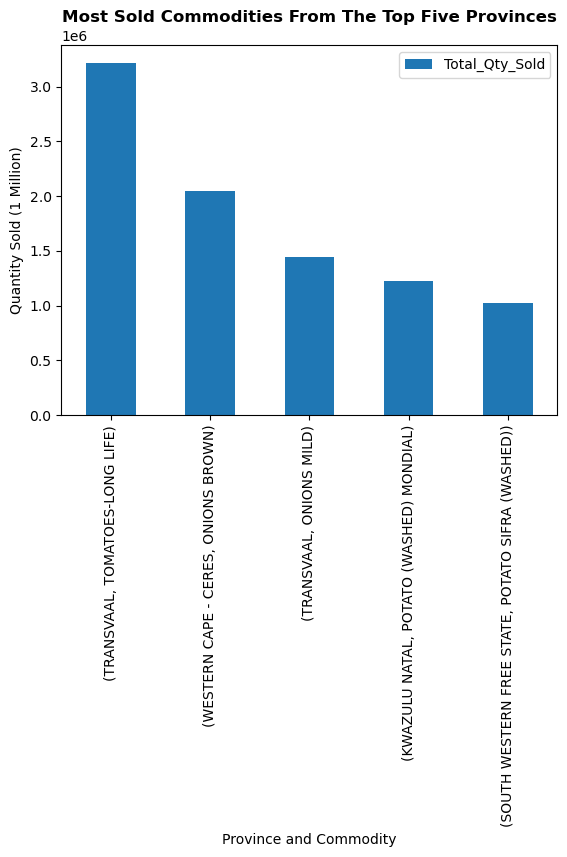

In [64]:
market.groupby(['Province','Commodities'])[['Total_Qty_Sold']].sum().nlargest(5,['Total_Qty_Sold']).plot(kind='bar')
plt.title("Most Sold Commodities From The Top Five Provinces",fontweight='bold')
plt.xlabel("Province and Commodity")
plt.ylabel('Quantity Sold (1 Million)')


Text(0.5, 1.0, 'Least Five Sold Commodities')

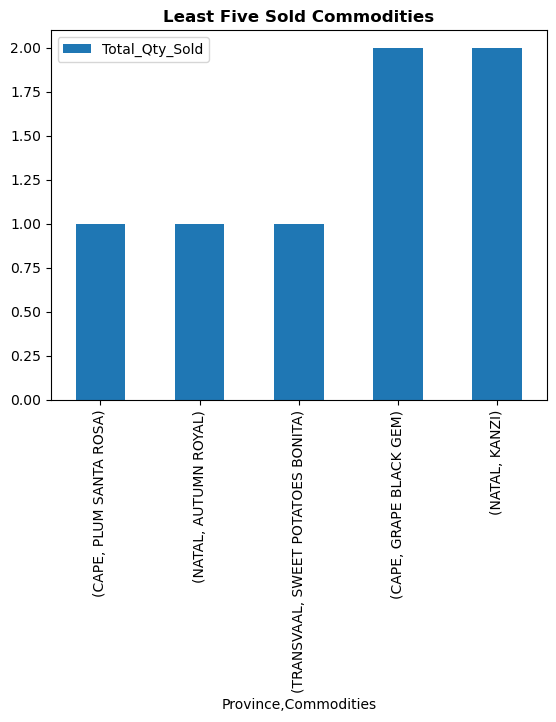

In [102]:
market.groupby(['Province','Commodities'])[['Total_Qty_Sold']].sum().nsmallest(5,['Total_Qty_Sold']).plot(kind='bar')
plt.title("Least Five Sold Commodities", fontweight='bold')

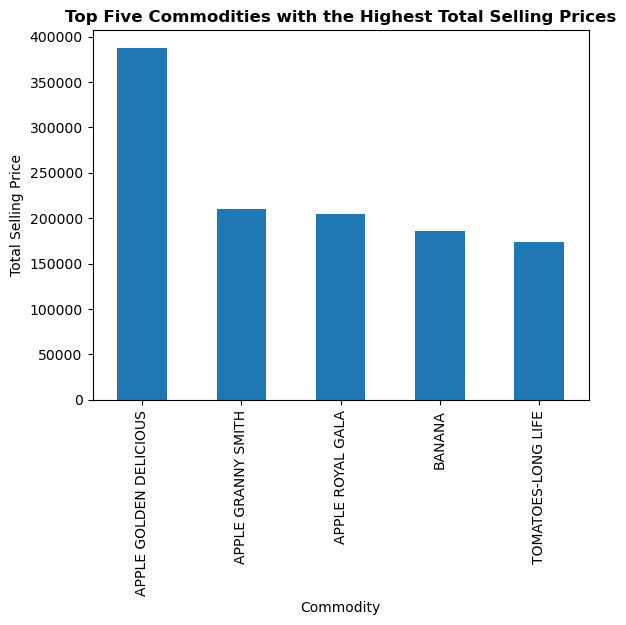

In [18]:
# Convert 'Selling_Price' column to numeric
market['selling_price'] = pd.to_numeric(market['selling_price'], errors='coerce')

# Drop rows with NaN values in 'Selling_Price' column
market = market.dropna(subset=['selling_price'])
top_commodities = market.groupby('Commodities')['selling_price'].sum().nlargest(5)


top_commodities.plot(kind='bar')
plt.xlabel("Commodity")
plt.ylabel("Total Selling Price")
plt.title('Top Five Commodities with the Highest Total Selling Prices',fontweight='bold')
plt.show()


In [15]:
market['Selling_Price'] = pd.to_numeric(market['Selling_Price'], errors='coerce')

# Drop rows with NaN values in 'Selling_Price' column
market = market.dropna(subset=['Selling_Price'])
top_commodities = market.groupby('Commodities')['Selling_Price'].sum()
top_commodities

/var/folders/59/nzz8v2013tsby595_yj460fr0000gn/T/ipykernel_91091/4104057989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market['Selling_Price'] = pd.to_numeric(market['Selling_Price'], errors='coerce')


Commodities
ABC JUICE                       202.300000
AFRICAN SUNSET                  609.035735
APPLE AFRICAN RED/CARMINE      1456.423337
APPLE BRAEBURN                13929.308894
APPLE CAMEO                    1028.000000
                                 ...      
TOMATOES SALADETTE            70394.025655
TOMATOES-LONG LIFE           174155.852505
VALLEY GOLD                    5318.332471
WASHED POTATOES                  65.000000
WATERMELON                     5173.795637
Name: Selling_Price, Length: 270, dtype: float64